# Exploring the Nature of OD Data

***
We wish to conduct an exploratory analysis on OD Data. Firstly, two CSV's are grabbed from BlipTrack `BlipTrack-Toronto_DT_OD_Start_End_Multiple_Outcomes_ut_20180101-20180102.csv` and `BlipTrack-Toronto_DT_OD_Others_Multiple_Outcomes_ut_20180101-20180102.csv`. The first is a binary containing data for the start of a route and the end of a route, with a 1 or 0 corresponding to whether or not that intersection was chosen as a start/end or not. The second is a table containing a particular route a vehicle has taken, with 1's and 0's corresponding to whether or not they passed a respective intersection on that route. 

<br>
We import these two tables into the alouis2 schema, under the names `startend_raw` and `others_raw`.

In [114]:
%load_ext sql
import matplotlib.pyplot as plt
import pandas as pd
import configparser
from psycopg2 import connect
import psycopg2.sql as pg
import pandas.io.sql as pandasql
CONFIG = configparser.ConfigParser()
CONFIG.read(r'C:\Users\alouis2\Documents\Python Scripts\db.cfg')
dbset = CONFIG['DBSETTINGS']
con = connect(**dbset)
x = open('C:\\Users\\alouis2\\Documents\\Python Scripts\\andrew.txt', 'r')
x = x.readlines()[0]
%sql $x

The sql extension is already loaded. To reload it, use:
  %reload_ext sql


'Connected: alouis2@bigdata'

## Creating our Primary Tables
***
We change extract relevant data we will be working with by selecting only the columns we need. Below are the queries used to create `others_path` and `startend_path`, two tables containing relevant information from their raw counterparts. 

In [77]:
%%sql
CREATE TABLE others_path
(
  datetime_bin timestamp without time zone,
  userid bigint,  co_ba integer,  co_un integer,  co_pa integer,  du_ro integer,  du_df integer,
  du_ba integer,  du_sp integer,  du_un integer,  du_yo integer,  du_ja integer,  du_pa integer,
  qu_ro integer,  qu_df integer,  qu_st integer,  qu_ba integer,  qu_sp integer,  qu_un integer,
  qu_yo integer,  qu_ja integer,  qu_pa integer,  qu_bv integer,  rm_ba integer,  rm_sp integer,
  rm_un integer,  rm_yo integer,  rm_ja integer,  rm_pa integer,  ad_ba integer,  ad_sp integer,
  ad_un integer,  ad_yo integer,  ad_ja integer,  ad_pa integer,  kn_df integer,  kn_st integer,
  kn_ba integer,  kn_sp integer,  kn_un integer,  kn_yo integer,  kn_ja integer,  kn_pa integer,
  we_bj integer,  we_un integer,  we_yo integer,  fr_ba integer,  fr_sp integer,  fr_un integer,
  fr_yo integer,  fr_ja integer,  fr_pa integer,  fb_ba integer,  fb_sp integer,  fb_yk integer,
  ea_bv integer,  path_total integer
)
WITH (
  OIDS=FALSE
);
ALTER TABLE others_path
  OWNER TO alouis2;


(psycopg2.ProgrammingError) relation "others_path" already exists
 [SQL: 'CREATE TABLE others_path\n(\n  datetime_bin timestamp without time zone,\n  userid bigint,  co_ba integer,  co_un integer,  co_pa integer,  du_ro integer,  du_df integer,\n  du_ba integer,  du_sp integer,  du_un integer,  du_yo integer,  du_ja integer,  du_pa integer,\n  qu_ro integer,  qu_df integer,  qu_st integer,  qu_ba integer,  qu_sp integer,  qu_un integer,\n  qu_yo integer,  qu_ja integer,  qu_pa integer,  qu_bv integer,  rm_ba integer,  rm_sp integer,\n  rm_un integer,  rm_yo integer,  rm_ja integer,  rm_pa integer,  ad_ba integer,  ad_sp integer,\n  ad_un integer,  ad_yo integer,  ad_ja integer,  ad_pa integer,  kn_df integer,  kn_st integer,\n  kn_ba integer,  kn_sp integer,  kn_un integer,  kn_yo integer,  kn_ja integer,  kn_pa integer,\n  we_bj integer,  we_un integer,  we_yo integer,  fr_ba integer,  fr_sp integer,  fr_un integer,\n  fr_yo integer,  fr_ja integer,  fr_pa integer,  fb_ba integer,  fb

In [78]:
%%sql 
CREATE TABLE startend_path
(
  datetime_bin timestamp without time zone,
  userid bigint,
  s_co_ba integer,  s_co_un integer,  s_co_pa integer,  s_du_ro integer,  s_du_df integer,
  s_du_ba integer,  s_du_sp integer,  s_du_un integer,  s_du_yo integer,  s_du_ja integer,
  s_du_pa integer,  s_qu_ro integer,  s_qu_df integer,  s_qu_st integer,  s_qu_ba integer,
  s_qu_sp integer,  s_qu_un integer,  s_qu_yo integer,  s_qu_ja integer,  s_qu_pa integer,
  s_qu_bv integer,  s_rm_ba integer,  s_rm_sp integer,  s_rm_un integer,  s_rm_yo integer,
  s_rm_ja integer,  s_rm_pa integer,  s_ad_ba integer,  s_ad_sp integer,  s_ad_un integer,
  s_ad_yo integer,  s_ad_ja integer,  s_ad_pa integer,  s_kn_df integer,  s_kn_st integer,
  s_kn_ba integer,  s_kn_sp integer,  s_kn_un integer,  s_kn_yo integer,  s_kn_ja integer,
  s_kn_pa integer,  s_we_bj integer,  s_we_un integer,  s_we_yo integer,  s_fr_ba integer,
  s_fr_sp integer,  s_fr_un integer,  s_fr_yo integer,  s_fr_ja integer,  s_fr_pa integer,
  s_fb_ba integer,  s_fb_sp integer,  s_fb_yk integer,  s_ea_bv integer,  e_co_ba integer,
  e_co_un integer,  e_co_pa integer,  e_du_ro integer,  e_du_df integer,  e_du_ba integer,
  e_du_sp integer,  e_du_un integer,  e_du_yo integer,  e_du_ja integer,  e_du_pa integer,
  e_qu_ro integer,  e_qu_df integer,  e_qu_st integer,  e_qu_ba integer,  e_qu_sp integer,
  e_qu_un integer,  e_qu_yo integer,  e_qu_ja integer,  e_qu_pa integer,  e_qu_bv integer,
  e_rm_ba integer,  e_rm_sp integer,  e_rm_un integer,  e_rm_yo integer,  e_rm_ja integer,
  e_rm_pa integer,  e_ad_ba integer,  e_ad_sp integer,  e_ad_un integer,  e_ad_yo integer,
  e_ad_ja integer,  e_ad_pa integer,  e_kn_df integer,  e_kn_st integer,  e_kn_ba integer,
  e_kn_sp integer,  e_kn_un integer,  e_kn_yo integer,  e_kn_ja integer,  e_kn_pa integer,
  e_we_bj integer,  e_we_un integer,  e_we_yo integer,  e_fr_ba integer,  e_fr_sp integer,
  e_fr_un integer,  e_fr_yo integer,  e_fr_ja integer,  e_fr_pa integer,  e_fb_ba integer,
  e_fb_sp integer,  e_fb_yk integer,  e_ea_bv integer
)
WITH (
  OIDS=FALSE
);
ALTER TABLE startend_path
  OWNER TO alouis2;


(psycopg2.ProgrammingError) relation "startend_path" already exists
 [SQL: 'CREATE TABLE startend_path\n(\n  datetime_bin timestamp without time zone,\n  userid bigint,\n  s_co_ba integer,  s_co_un integer,  s_co_pa integer,  s_du_ro integer,  s_du_df integer,\n  s_du_ba integer,  s_du_sp integer,  s_du_un integer,  s_du_yo integer,  s_du_ja integer,\n  s_du_pa integer,  s_qu_ro integer,  s_qu_df integer,  s_qu_st integer,  s_qu_ba integer,\n  s_qu_sp integer,  s_qu_un integer,  s_qu_yo integer,  s_qu_ja integer,  s_qu_pa integer,\n  s_qu_bv integer,  s_rm_ba integer,  s_rm_sp integer,  s_rm_un integer,  s_rm_yo integer,\n  s_rm_ja integer,  s_rm_pa integer,  s_ad_ba integer,  s_ad_sp integer,  s_ad_un integer,\n  s_ad_yo integer,  s_ad_ja integer,  s_ad_pa integer,  s_kn_df integer,  s_kn_st integer,\n  s_kn_ba integer,  s_kn_sp integer,  s_kn_un integer,  s_kn_yo integer,  s_kn_ja integer,\n  s_kn_pa integer,  s_we_bj integer,  s_we_un integer,  s_we_yo integer,  s_fr_ba integer,\n  

## Eliminating Path Totals of 1
***
Now we have only relevant information we need for our exploratory analysis, which makes queries easier to run. Moreover, we create a column `path_total` for our table `others_path` so we now how many interections were passed for each particular route. 

<br>
Notice the discrepancy between the path data and the startend data, i.e. 21205 vs 14667 rows. This is because there are many datapoints in `others_raw` with a path total of 1. To eliminate this discrepancy, we have to eliminate all `path_total` values of 1. We do this with the following code:

In [79]:
%%sql DELETE FROM alouis2.others_path
WHERE path_total = 1;

0 rows affected.


[]

In [80]:
%sql select count(datetime_bin)from startend_path

1 rows affected.


count
14667


In [81]:
%sql select count(datetime_bin)from others_path

1 rows affected.


count
14667


As seen above, after deleting all rows with 1 path totals, the row counts are the same. Now we have for each datetime stamp and user id, an origin, destination, and path. However, this information is split accross our two schemas. We wish to combine them to facilitate analysis.


## Pivoting Start/End Data
***
Firstly, we need to pivot `startend_path`. What do we mean by pivot? We want to create a `start` and `end` column, containing a text representing the origin and destination of a vehicle. Essentially we will convert the binary table to a much more easier to read start/end table.

<br> 
Please refer to the `pivot.ipynb` to see how this was done. We now have a new table, `startend_pivot`. A few rows are selected below: 

In [82]:
%sql select * from alouis2.startend_pivot limit 10

10 rows affected.


datetime_bin,userid,start,end
2018-01-01 00:00:17,-4109236477481291089,du_yo,du_ja
2018-01-01 00:01:08,-1672501126208601408,du_pa,qu_bv
2018-01-01 00:01:11,-5833274664015405017,du_ja,du_yo
2018-01-01 00:02:08,8147950039115731659,du_pa,du_ja
2018-01-01 00:02:11,2538540623439968621,kn_df,du_df
2018-01-01 00:02:47,1200906276903573645,fr_ja,du_ja
2018-01-01 00:02:59,-4164760066955224419,du_df,qu_ro
2018-01-01 00:02:59,8620276987661645868,ad_ba,qu_ba
2018-01-01 00:03:16,6853760512054168715,co_un,du_un
2018-01-01 00:03:22,-7601830370391951161,qu_sp,co_un


This is much easier to read. Now we create a view to join `startend_pivot` and `others_path` to create a complete table summarizing our OD Data. 

In [83]:
%%sql CREATE OR REPLACE VIEW complete AS 
 SELECT startend_pivot.datetime_bin,
    startend_pivot.userid,     startend_pivot.start,    startend_pivot."end",    others_path.co_ba,
    others_path.co_un,    others_path.co_pa,    others_path.du_ro,    others_path.du_df,    others_path.du_ba,
    others_path.du_sp,    others_path.du_un,    others_path.du_yo,    others_path.du_ja,    others_path.du_pa,
    others_path.qu_ro,    others_path.qu_df,    others_path.qu_st,    others_path.qu_ba,    others_path.qu_sp,    
    others_path.qu_un,    others_path.qu_yo,    others_path.qu_ja,    others_path.qu_pa,    others_path.qu_bv,
    others_path.rm_ba,    others_path.rm_sp,    others_path.rm_un,    others_path.rm_yo,    others_path.rm_ja,
    others_path.rm_pa,    others_path.ad_ba,    others_path.ad_sp,    others_path.ad_un,    others_path.ad_yo,
    others_path.ad_ja,    others_path.ad_pa,    others_path.kn_df,    others_path.kn_st,    others_path.kn_ba,
    others_path.kn_sp,    others_path.kn_un,    others_path.kn_yo,    others_path.kn_ja,    others_path.kn_pa,
    others_path.we_bj,    others_path.we_un,    others_path.we_yo,    others_path.fr_ba,    others_path.fr_sp,
    others_path.fr_un,    others_path.fr_yo,    others_path.fr_ja,    others_path.fr_pa,    others_path.fb_ba,
    others_path.fb_sp,    others_path.fb_yk,    others_path.ea_bv,    others_path.path_total
   FROM startend_pivot
     JOIN others_path USING (datetime_bin, userid);

ALTER TABLE complete
  OWNER TO alouis2;


Done.
Done.


[]

In [84]:
%sql select * from complete limit 10;

10 rows affected.


datetime_bin,userid,start,end,co_ba,co_un,co_pa,du_ro,du_df,du_ba,du_sp,du_un,du_yo,du_ja,du_pa,qu_ro,qu_df,qu_st,qu_ba,qu_sp,qu_un,qu_yo,qu_ja,qu_pa,qu_bv,rm_ba,rm_sp,rm_un,rm_yo,rm_ja,rm_pa,ad_ba,ad_sp,ad_un,ad_yo,ad_ja,ad_pa,kn_df,kn_st,kn_ba,kn_sp,kn_un,kn_yo,kn_ja,kn_pa,we_bj,we_un,we_yo,fr_ba,fr_sp,fr_un,fr_yo,fr_ja,fr_pa,fb_ba,fb_sp,fb_yk,ea_bv,path_total
2018-01-01 00:00:17,-4109236477481291089,du_yo,du_ja,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2
2018-01-01 00:01:08,-1672501126208601408,du_pa,qu_bv,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2
2018-01-01 00:01:11,-5833274664015405017,du_ja,du_yo,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2
2018-01-01 00:02:08,8147950039115731659,du_pa,du_ja,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2
2018-01-01 00:02:11,2538540623439968621,kn_df,du_df,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2
2018-01-01 00:02:47,1200906276903573645,fr_ja,du_ja,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,5
2018-01-01 00:02:59,-4164760066955224419,du_df,qu_ro,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3
2018-01-01 00:02:59,8620276987661645868,ad_ba,qu_ba,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3
2018-01-01 00:03:16,6853760512054168715,co_un,du_un,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2
2018-01-01 00:03:22,-7601830370391951161,qu_sp,co_un,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2


Now we have a table with a date, userid, start, end, and binary representation of a path. This will be very useful and it will be our primary table when analyzing discrepancies in our OD data. 

## Comparing OD Data and Segment Data
***
We wish to start comparing segment data with OD data. In order to do this, we need relevant segment data. The observation schema is huge, so it's important to only select the parameters and columns we want. 

<br>
In our case, we are only interested in date on `2018-01-01`, as this is the date relevant to our OD Data. Moreover, we are only interested in the `startpoint` and `endpoint` columns, as they tell us the beginning and end of a segment that we can compare with origin/destination values. 

<br>
Most importantly, we only need segments relevant to our date. In the bluetooth schema, there are a tonne of arterial and other roads that are not related to our OD analyis. For this reason, we filter out the `observations_201801` data according to relevant analysis id's. We obtain these analysis id's via the `bt_segments` table. From this, we create the following view:

In [85]:
%%sql 

CREATE OR REPLACE VIEW segs AS 
 SELECT observations_201801.user_id AS userid,
    observations_201801.measured_timestamp AS datetime_bin,
    observations_201801.startpoint_name,
    observations_201801.endpoint_name
   FROM bluetooth.observations_201801
     JOIN king_pilot.bt_segments USING (analysis_id)
  WHERE observations_201801.measured_timestamp::date = '2018-01-01'::date;

ALTER TABLE segs
  OWNER TO alouis2;


Done.
Done.


[]

In [86]:
%sql select * from segs limit 10;

10 rows affected.


userid,datetime_bin,startpoint_name,endpoint_name
5743397643185836572,2018-01-01 00:01:38,DU_SP,QU_SP
1983310123336577193,2018-01-01 00:01:48,DU_SP,QU_SP
5845560332819052158,2018-01-01 00:02:02,DU_SP,QU_SP
-5467631566719003672,2018-01-01 00:03:26,DU_SP,QU_SP
3183759557119372248,2018-01-01 00:03:35,DU_SP,QU_SP
-4833118714705926778,2018-01-01 00:04:30,DU_SP,QU_SP
8354011825964247019,2018-01-01 00:05:09,DU_SP,QU_SP
4555555699814881036,2018-01-01 00:06:31,DU_SP,QU_SP
-8424651304893524140,2018-01-01 00:06:32,DU_SP,QU_SP
6439947428109779441,2018-01-01 00:06:35,DU_SP,QU_SP


Now we join the two views, `segs` and `complete`. 

In [87]:
%%sql
SELECT complete.datetime_bin, complete.userid, complete.start as origin, complete.end as destination, complete.path_total, startpoint_name as segment_start, endpoint_name as segment_end
FROM segs
LEFT JOIN alouis2.complete
ON segs.datetime_bin::date = complete.datetime_bin::date
AND segs.userid = complete.userid
LIMIT 15

15 rows affected.


datetime_bin,userid,origin,destination,path_total,segment_start,segment_end
None,None,None,None,None,DU_SP,QU_SP
2018-01-01 03:13:27,1983310123336577193,ea_bv,co_ba,4,DU_SP,QU_SP
2018-01-01 03:50:40,1983310123336577193,fr_un,fr_yo,2,DU_SP,QU_SP
2018-01-01 04:50:16,1983310123336577193,fb_ba,qu_ro,11,DU_SP,QU_SP
2018-01-01 06:06:41,1983310123336577193,du_df,co_un,19,DU_SP,QU_SP
2018-01-01 06:54:46,1983310123336577193,rm_pa,qu_yo,10,DU_SP,QU_SP
2018-01-01 08:42:02,1983310123336577193,co_un,du_pa,15,DU_SP,QU_SP
2018-01-01 10:06:59,1983310123336577193,qu_sp,ad_sp,12,DU_SP,QU_SP
2018-01-01 11:34:26,1983310123336577193,fb_sp,du_yo,21,DU_SP,QU_SP
2018-01-01 13:24:06,1983310123336577193,qu_yo,qu_ro,24,DU_SP,QU_SP


## Verifying Start/End Timestamp
***
Now we have OD information, a column for path total, and two columns representing the start and end of the corresponding segment. 

<br>
Before we begin investigating discrepancies, let's verify whether the timestamps for OD Data are start or end timestamps. To do this, we select an arbitrary user id from `complete` and `segs`. If the time stamp from `complete` is equivalent to the last time stamp in `segs` for our userid, then the time stamp is an end time. Conversely, if the time stamp from `complete` is equivalent to the first time stamp in `segs` for our userid, then the time stamp is a start time.

In [88]:
%%sql

SELECT * FROM segs
WHERE userid = -8424651304893524140
ORDER BY datetime_bin

3 rows affected.


userid,datetime_bin,startpoint_name,endpoint_name
-8424651304893524140,2018-01-01 00:06:32,DU_SP,QU_SP
-8424651304893524140,2018-01-01 00:09:12,QU_SP,QU_BA
-8424651304893524140,2018-01-01 00:10:45,QU_BA,QU_ST


In [89]:
%%sql 

SELECT datetime_bin, userid, complete.start, complete.end FROM complete
WHERE userid = -8424651304893524140; 

1 rows affected.


datetime_bin,userid,start,end
2018-01-01 00:10:45,-8424651304893524140,du_sp,qu_st


We can see from the above queries that the last time stamp from `segs` is the same as the time stamp from `complete`. Therefore, for our OD Data, we can conclude that the timestamps are ***End Times***. 

## Investigating Discrepancies
***

Now we are interested in seeing discrepancies between the number of segments per path vs the path total. Ideally, for each path of $x$ points, we would have $x-1$ segments, because each segment contains two points. 


<br> Let's investigate this by counting the segments per path via a group by clause. 

In [90]:
%%sql 

WITH final as(
SELECT complete.datetime_bin, complete.userid, complete.start as origin, complete.end as destination, complete.path_total, startpoint_name as segment_start, endpoint_name as segment_end
FROM segs
LEFT JOIN alouis2.complete
ON segs.datetime_bin::date = complete.datetime_bin::date
AND segs.userid = complete.userid
WHERE path_total > 1)

SELECT datetime_bin, userid, count(distinct(final.*)) as segment_total, origin, destination, path_total
FROM final
GROUP BY datetime_bin, userid, origin, destination, path_total
LIMIT 20

20 rows affected.


datetime_bin,userid,segment_total,origin,destination,path_total
2018-01-01 00:00:17,-4109236477481291089,17,du_yo,du_ja,2
2018-01-01 00:01:08,-1672501126208601408,5,du_pa,qu_bv,2
2018-01-01 00:01:11,-5833274664015405017,1,du_ja,du_yo,2
2018-01-01 00:02:08,8147950039115731659,1,du_pa,du_ja,2
2018-01-01 00:02:11,2538540623439968621,51,kn_df,du_df,2
2018-01-01 00:02:47,1200906276903573645,4,fr_ja,du_ja,5
2018-01-01 00:02:59,-4164760066955224419,16,du_df,qu_ro,3
2018-01-01 00:02:59,8620276987661645868,1,ad_ba,qu_ba,3
2018-01-01 00:03:16,6853760512054168715,3,co_un,du_un,2
2018-01-01 00:04:06,-3110345525259057486,3,co_un,du_yo,2


Just from this sample of 20 rows from our group by query, we can see that discrepancies between segment data and OD data exist. Let's see what percentage of these segment/od combinations are ideal, i.e for a OD path with path total $x$, the segment total is $x-1$. 

<br>
Note that we have **13115** `userid` and `datetime_bin` combinations. 

In [91]:
%%sql
WITH ideals as (WITH final as(
SELECT complete.datetime_bin, complete.userid, complete.start as origin, complete.end as destination, complete.path_total, startpoint_name as segment_start, endpoint_name as segment_end
FROM segs
LEFT JOIN alouis2.complete
ON segs.datetime_bin::date = complete.datetime_bin::date
AND segs.userid = complete.userid
WHERE path_total > 1)

                
SELECT datetime_bin, userid, count(distinct(final.*)) as segment_total, origin, destination, path_total
FROM final
GROUP BY datetime_bin, userid, origin, destination, path_total
having count(distinct(final.*)) = path_total -1)  

select count(*) from ideals; 

1 rows affected.


count
3191


Let's call these 'ideal' combos perfect paths. This means that of 13115 paths, 3191 are perfect. 

<br>
Therefore approximately **24.3**% of Origin/Destination Paths can be represented via Bluetooth Segment data. 

What about bluetooth segments that are missing 1 segment per path? Or 2 segments per path? Or have more segments than path points?

We define our discrepancy to be `segment_total` - `path_total`. We wish to investigate discrepancies that are not -1, i.e. those that are imperfect

C:\Users\alouis2\AppData\Local\Continuum\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2862: FutureWarning: 
mpl_style had been deprecated and will be removed in a future version.
Use `matplotlib.pyplot.style.use` instead.

  exec(code_obj, self.user_global_ns, self.user_ns)


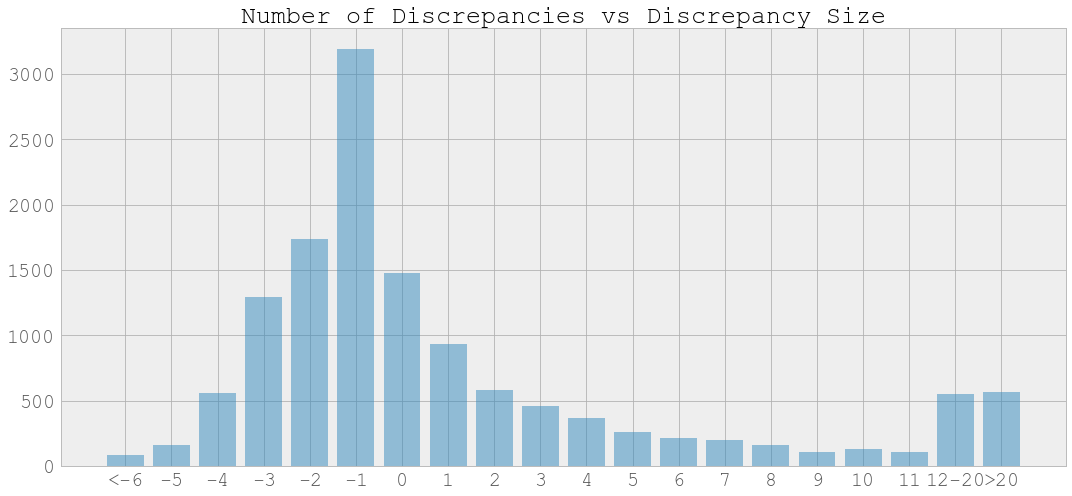

In [154]:
y = [562, 548, 102, 126, 108, 162, 196, 210, 260, 369, 455, 577, 935, 1479, 3191, 1739, 1290, 559, 161, 86]
x = [13, 12, 11, 10, 9, 8, 7, 6, 5, 4, 3, 2, 1, 0, -1, -2, -3, -4, -5, -6]
labels = [str(i) for i in x]
labels[1] = '12-20'
labels[0] = '>20'
labels[(len(labels)-1)] = '<-6'

plt.figure(figsize = (15,7))
plt.xticks(x, labels)
pd.options.display.mpl_style = 'default'
plt.bar(x, y, align='center', alpha=0.5)
matplotlib.rc('xtick', labelsize=20) 
matplotlib.rc('ytick', labelsize=20) 
plt.title("Number of Discrepancies vs Discrepancy Size", fontsize = 25)
plt.tight_layout()
plt.show()


From the above graph, it seems as though as `segment_total` appraches `path_total`, the count increases. More interestingly, as there is an increasing positive difference between `segment_total` and `path_total`, the count decreases, but then after a positive discrepancy of 12, the count increases drastically! 

<br>
We will further investigate this later. 

## Is Segment Discrepancy dependent on Path Total?
***

We speculate that as path totals increase, the bluetooth segment data becomes more and more inaccurate at representing OD Data. 

<br> We analyze this by comparing segment and OD Data at various Path Totals. Let's start with path totals of 2, i.e. simply going from one intersection to another. Note that there are **3508** paths with path totals of 2. 

In [111]:
%%sql
WITH ideals as (WITH final as(
SELECT complete.datetime_bin, complete.userid, complete.start as origin, complete.end as destination, complete.path_total, startpoint_name as segment_start, endpoint_name as segment_end
FROM segs
LEFT JOIN alouis2.complete
ON segs.datetime_bin::date = complete.datetime_bin::date
AND segs.userid = complete.userid
WHERE path_total = 2)

                
SELECT datetime_bin, userid, count(distinct(final.*)) as segment_total, origin, destination, path_total
FROM final
GROUP BY datetime_bin, userid, origin, destination, path_total
having count(distinct(final.*)) = path_total -1)  

select count(*) from ideals

1 rows affected.


count
1696


This means that for path totals of 2, 1696/3508 = ***48% of the OD data is perfectly represented by Bluetooth segment data***. We automate this process over various path totals. 

In [ ]:
pathtotals = [i+2 for i in range(23)]
totals = []
segment_percentages = []

for i in pathtotals:
    sql1 = pg.SQL('''WITH ideals as (WITH final as(
                    SELECT complete.datetime_bin, complete.userid, complete.start as origin, complete.end as destination, complete.path_total, startpoint_name as segment_start, endpoint_name as segment_end
                    FROM segs
                    LEFT JOIN alouis2.complete
                    ON segs.datetime_bin::date = complete.datetime_bin::date
                    AND segs.userid = complete.userid
                    WHERE path_total = %d)

                    SELECT datetime_bin, userid, count(distinct(final.*)) as segment_total, origin, destination, path_total
                    FROM final
                    GROUP BY datetime_bin, userid, origin, destination, path_total) 

                    select count(*) from ideals''' % i )

    sql2 = pg.SQL('''WITH ideals as (WITH final as(
                    SELECT complete.datetime_bin, complete.userid, complete.start as origin, complete.end as destination, complete.path_total, startpoint_name as segment_start, endpoint_name as segment_end
                    FROM segs
                    LEFT JOIN alouis2.complete
                    ON segs.datetime_bin::date = complete.datetime_bin::date
                    AND segs.userid = complete.userid
                    WHERE path_total = %d)


                    SELECT datetime_bin, userid, count(distinct(final.*)) as segment_total, origin, destination, path_total
                    FROM final
                    GROUP BY datetime_bin, userid, origin, destination, path_total
                    having count(distinct(final.*)) = path_total -1)  

                    select count(*) from ideals''' % i)
    total = pandasql.read_sql(sql1, con).values[0][0]
    totals.append(total)
    perfect = pandasql.read_sql(sql2, con).values[0][0]
    segment_percentages.append(perfect/total * 100)



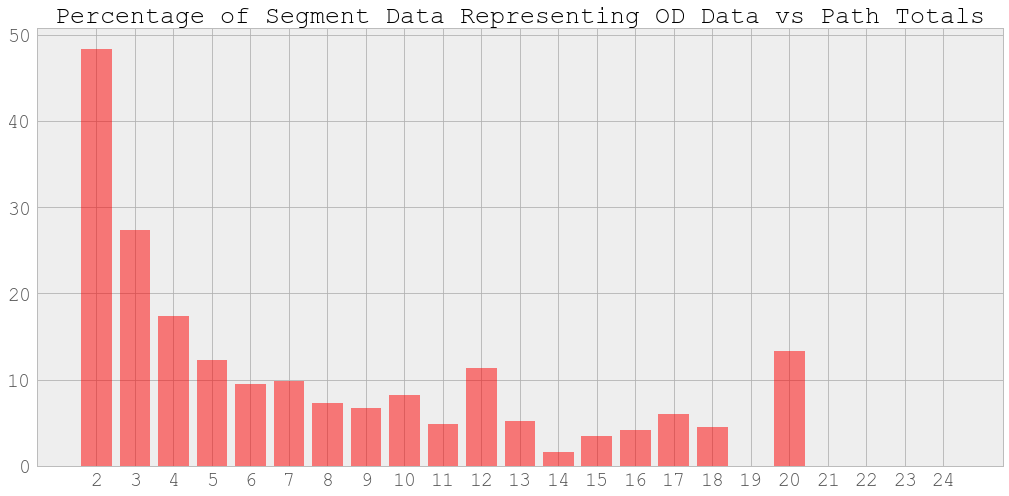

In [158]:
plt.figure(figsize = (15,7))
plt.bar(pathtotals, segment_percentages, align='center', alpha=0.5, color = 'red')
labels = [str(i) for i in pathtotals]
matplotlib.rc('xtick', labelsize=20) 
matplotlib.rc('ytick', labelsize=20) 
plt.xticks(pathtotals, labels)
plt.title("Percentage of Segment Data Representing OD Data vs Path Totals", fontsize = 25)
plt.tight_layout()
plt.show()


Our hypothesis is correct. As the path becomes more complex, Bluetooth Segment data becomes increasingly poor at representing OD Data. 